<span style="font-size: 24px;">Visualize the Lattice for a coupling J =1</span>


<span style="font-size: 18px;">Table of contents</span>

1. [Check Data loading](#check)
2. [Plot Loaded data](#plot)
3. [Plot accross temperatures](#plot_t)
4. [Average magnetisation plot](#Avg_mag)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob




## 1. Check Data Loading
<a id="check"></a>
<span style="font-size: 20px;">Check whether the data gets loaded correctly and also check the shape</span>

In [7]:
# Load the generated temperature files
files = sorted(glob.glob("../data/ising_L32_T*.npy"))
print(f"Found {len(files)} temperature datasets")

# Pick one, e.g. the low temperature (ordered) and high temperature (disordered)
lowT = np.load(files[0])     # T ≈ 1.0
highT = np.load(files[-1])   # T ≈ 5.0

print("Low Temperature shape:", lowT.shape)
print("High Temperature shape:", highT.shape)




Found 11 temperature datasets
Low Temperature shape: (100, 32, 32)
High Temperature shape: (100, 32, 32)


<a id="plot"></a>

## 2. Plot Loaded Data
<span style="font-size: 20px;">Plot the  configurations loaded above for two Extreme Cases</span>

1. Low temperature where all spins are either 1 or -1
2. High temperature where all spins are random and can have 1 or -1

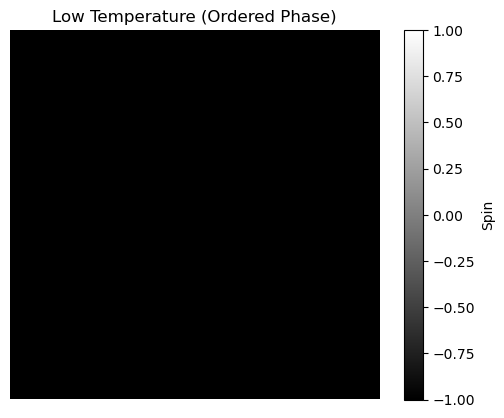

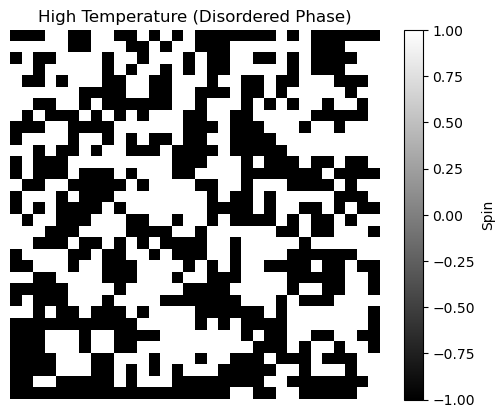

In [5]:
def show_lattice(lattice, title="Ising configuration"):
    plt.imshow(lattice, cmap='grey', interpolation='nearest',vmin=-1,vmax=1)
    plt.colorbar(label="Spin")
    plt.title(title)
    plt.axis("off")
    plt.show()

# Display a few random configurations
show_lattice(lowT[2], title="Low Temperature (Ordered Phase)")
show_lattice(highT[2], title="High Temperature (Disordered Phase)")


<a id="plot_t"></a>

## 3. Plot accross temperatures
<span style="font-size: 20px;">Plot the  configurations at different temperatures to see the phase transition at T_c ≈ 2.26 </span>

Note : This value of 2.26 was calculated exactly by Lars Onsager . We expect to get this value after applying the machine learning technique here

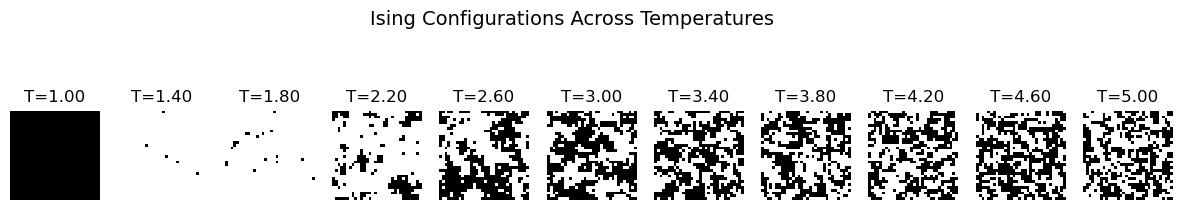

In [15]:
fig, axes = plt.subplots(1,11, figsize=(15, 3))
temps = np.linspace(1.0, 5.0, 11)

for ax, T in zip(axes, temps):
    data = np.load(f"../data/ising_L32_T{T:.2f}.npy")
    ax.imshow(data[34], cmap='grey', interpolation='nearest',vmin=-1,vmax=1)
    ax.set_title(f"T={T:.2f}")
    ax.axis('off')

plt.suptitle("Ising Configurations Across Temperatures", fontsize=14)
plt.show()



<a id="Avg_mag"></a>

## 4. Average magnetisation plot


<span style="font-size: 20px;">Plot of Average magnetisation vs Temperature.</span>

Average magentisation is calculated for a given temperature by first taking the mean of all spins in a given lattice at that temperate  (converted to absolute value). Then the  mean accross all such lattice of the same temperature gives the average magnetisation.

We see that average magnetisation drops at around 2.269 temeperature units, marking the transition 

Text(0, 0.5, 'Avg. magnetisation')

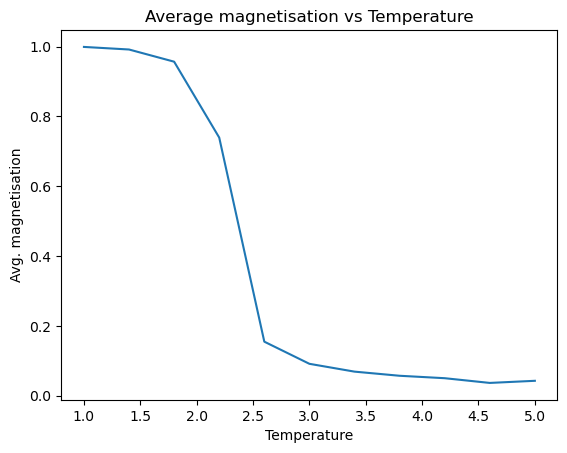

In [24]:
avg_mags=[]

for f in files:
    configs = np.load(f)
    mags = np.mean(np.abs(np.mean(configs,axis=(1,2))))    # average magnetisation calculatiom
    avg_mags.append(mags)


plt.plot(temps,avg_mags)

plt.title('Average magnetisation vs Temperature')

plt.xlabel('Temperature')
plt.ylabel('Avg. magnetisation')
    